
# Machine Learning Based Recommendation Systems
##  Model-based Collaborative Filtering Systems
## SVD Matrix Factorization

In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import TruncatedSVD

The MovieLens dataset was collected by the GroupLens Research Project at the University of Minnesota. You can download the dataset for this demostration at the following URL: https://grouplens.org/datasets/movielens/100k/

### Preparing the data

In [2]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
frame = pd.read_csv('ml-100k/u.data', sep='\t', names=columns)
frame.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
columns = ['item_id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
          'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|', names=columns, encoding='latin-1')
movie_names = movies[['item_id', 'movie title']]
movie_names.head()

,item_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
combined_movies_data = pd.merge(frame, movie_names, on='item_id')
combined_movies_data.head()

,user_id,item_id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:
combined_movies_data.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [15]:
filter = combined_movies_data['item_id']==50
combined_movies_data[filter]['movie title'].unique()

array(['Star Wars (1977)'], dtype=object)

### Building a Utility Matrix

In [18]:
# fill_value in pivot_table replace NaN data to inserted argument
rating_crosstab = combined_movies_data.pivot_table(values='rating', index='user_id', columns='movie title', fill_value=0)
rating_crosstab.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,4,0,0,...,0,0,0,4,0,0,0,0,4,0


### Transposing the Matrix

In [19]:
rating_crosstab.shape

(943, 1664)

In [27]:
X = rating_crosstab.T
X.shape

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2 Days in the Valley (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"20,000 Leagues Under the Sea (1954)",3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),4.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3 Ninjas: High Noon At Mega Mountain (1998),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Decomposing the Matrix

In [28]:
SVD = TruncatedSVD(n_components=12, random_state=17)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(1664, 12)

In [34]:
resultant_matrix[0]

array([ 1.03999361,  0.6598845 ,  0.04568944,  0.81444724,  0.16747427,
       -0.98316366, -0.3198289 ,  0.3067836 , -0.03084219, -0.75356126,
       -0.30152968, -0.53651145])

In [49]:

import matplotlib.pyplot as plt
%matplotlib inline

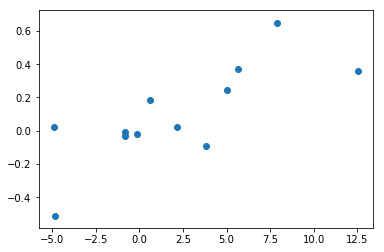

In [65]:
plt.scatter(resultant_matrix[2], resultant_matrix[1661])

In [64]:
np.corrcoef(resultant_matrix[2], resultant_matrix[1661])

array([[ 1.       ,  0.7658073],
       [ 0.7658073,  1.       ]])

In [55]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(1664, 1664)

In [56]:
corr_mat

array([[ 1.        , -0.10298113,  0.52210159, ...,  0.39854553,
         0.22143017,  0.5039286 ],
       [-0.10298113,  1.        ,  0.06549218, ...,  0.16134137,
         0.5091753 ,  0.23355053],
       [ 0.52210159,  0.06549218,  1.        , ...,  0.7658073 ,
         0.44348034,  0.19721751],
       ..., 
       [ 0.39854553,  0.16134137,  0.7658073 , ...,  1.        ,
         0.18088492,  0.10342131],
       [ 0.22143017,  0.5091753 ,  0.44348034, ...,  0.18088492,
         1.        ,  0.18524109],
       [ 0.5039286 ,  0.23355053,  0.19721751, ...,  0.10342131,
         0.18524109,  1.        ]])

### Generating a Correlation Matrix

### Isolating Star Wars From the Correlation Matrix

In [44]:
movie_names = rating_crosstab.columns
movie_list = list(movie_names)
star_wars = movie_list.index('Star Wars (1977)')
star_wars

1398

In [45]:
corr_mat[star_wars].shape

(1664,)

### Recommending a Highly Correlated Movie

In [47]:
list(movie_names[(corr_mat[star_wars]<1.0) & (corr_mat[star_wars] > 0.9)])

['Die Hard (1988)',
 'Empire Strikes Back, The (1980)',
 'Fugitive, The (1993)',
 'Raiders of the Lost Ark (1981)',
 'Return of the Jedi (1983)',
 'Terminator 2: Judgment Day (1991)',
 'Terminator, The (1984)',
 'Toy Story (1995)']

In [48]:
list(movie_names[(corr_mat[star_wars]<1.0) & (corr_mat[star_wars] > 0.95)])

['Return of the Jedi (1983)']